# Data Rate Stack Plot

In [28]:
import numpy as np           
import matplotlib.pyplot as plt
import os
import fnmatch
import astropy.units as u
from astropy.time import Time
from sunpy.time import parse_time
from astropy.table import Table
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
%matplotlib inline  

plt.rcdefaults()

import matplotlib.path as mpath
import matplotlib.lines as mlines
from matplotlib.collections import PatchCollection

In [29]:
mission=['SPP', 'SO','DKIST', 'SDO', 'SOLIS', 'STEREOA', 'HINODE', 'IRIS', 'RHESSI', 'SOHO', 'GONG', 'TRACE', 'YOHKOH', 'STEREOB', 'GONG+', 'SUVI', 'STEREO']

Start date rounded to the nearest month:

In [30]:
begin_date=Time(['2019-01-01', '2019-03-01', '2019-05-01', '2010-04-01', '2004-01-01','2006-09-01','2006-06-01','2013-07-01','2002-02-01','1996-01-01', '1995-09-01','1998-02-01','1991-09-01', '2006-09-01', '2001-06-01', '2017-02-01', '2006-09-01'],scale='utc') 

Ending Date is hard to estimate, but here it goes:

In [31]:
end_date=Time(['2029-01-01', '2029-03-01', '2035-01-01', '2025-04-01', '2035-01-01','2021-09-01','2021-06-01','2023-07-01','2022-02-01','2021-01-01', '2001-06-01','2010-06-01','2001-12-01', '2014-10-01', '2035-01-01', '2035-01-01', '2021-09-01'], scale='utc')

In [32]:
n_days=(end_date-begin_date)

Sources:
DKIST - http://dkist.nso.edu/sites/atst.nso.edu/files/images/SolarDataVolumeGrowth.png "Annual data volume of 8 - 15 TB per day"

STEREO - "Bill Thompson estimates that the current size of the STEREO archive is 54 terabytes, almost all of which is primary data.  If one excludes derived data products, then the size is probably on the order of 51-52 terabytes.  Looking at recent data, we're currently collecting about 8 gigabytes of data per day from all the instruments combined on Ahead. If Behind is recovered, that rate would double."

IRIS - Adiran Daw estimates "About 3 TB/year each for level 2 and level 1. (note level 1 is minimally processed, and not worth keeping both level 0 and 1 around)" = 8.21 GB/day for level 1 

SDO - Dean Pesnell: "1.5 TB per day is pulled down from the sattelite which is uncompressed to 4-6 TB on the ground."

Yohoh - 1 GB per day (J.Gurman - "Blue Ball Plot")

SOHO - 1 GB per day (J.Gurman - "Blue Ball Plot")

GONG - 2.418 GB per day (J.Gurman - "Blue Ball Plot")

TRACE - 0.37 GB per day (J.Gurman - "Blue Ball Plot")

GONG+ - 50 GB per day (J.Gurman - "Blue Ball Plot")

SOLIS - 43 GB per day (J.Gurman - "Blue Ball Plot")

RHESSI - 1.8 GB per day (J.Gurman - "Blue Ball Plot")

HINODE - 7.8 GB per day (J.Gurman - "Blue Ball Plot")

SPP - "downlink rate: 167 kb/s at 1 AU [http://solarprobe.jhuapl.edu/]" (= 1.8 GB/day max) True throughput relies on the deep space network. We estimate the average rate to be about 25% of their max rate (= 0.45 GB/day) 

SO - We estimate comperable rates to SPP. 

SUVI - "the actual returned data volume from the spacecraft per day, ignoring metadata, is just over 23 GB" Dan Seaton


In [33]:
data_rate=np.array([0.45, 0.45, 15000, 1500, 43, 8, 7.8, 8.21, 1.8, 1, 2.418, 0.37, 1, 8, 50, 23, 16])*1e9*u.byte/u.day

We estimate the total data rate of the archive where we can. 

DKIST = 15 TB (1x)

STEREO A = 8 GB (1x)

STEREO B = 8 GB (1x)

STEREO = 16 GB (STEREO A + B)

IRIS = 16.4 GB (2x)

SDO = 6 TB (4x)

SO = 2 GB (assuming a compression similarity to SDO)

SPP = 2 GB (assuming a compression similarity to SDO)

Yohoh - 1 GB (1x)

SOHO - 1 GB (1x)

GONG - 2.418 (1x)

TRACE - 0.37 (1x)

GONG+ - 50 GB (1x)

SOLIS - 43 GB (1x)

RHESSI - 1.8 (1x)

HINODE - 7.8 (1x)

SUVI = 92 GB (assuming a compression similarity to SDO)


In [34]:
data_archive=np.array([1.0, 1.0, 15000, 6000, 43, 8, 7.8, 16.4, 1.8, 1, 2.418, 0.37, 1, 8, 50, 92, 16])*1e9*u.byte/u.day

In [35]:
(data_rate[1]*(6*u.hour)).decompose()

<Quantity 900000000.0 bit>

In [36]:
total_data=(end_date-begin_date)*data_archive


In [37]:
rate_table=Table([mission, begin_date, end_date, data_rate, total_data], names=('Mission', 'Begin', 'End', 'Data Rate', 'Total Volume'))


In [38]:
rate_table

Mission,Begin,End,Data Rate,Total Volume
,,,byte / d,byte
str7,object,object,float64,float64
SPP,2019-01-01 00:00:00.000,2029-01-01 00:00:00.000,450000000.0,3.653e+12
SO,2019-03-01 00:00:00.000,2029-03-01 00:00:00.000,450000000.0,3.653e+12
DKIST,2019-05-01 00:00:00.000,2035-01-01 00:00:00.000,1.5e+13,8.586e+16
SDO,2010-04-01 00:00:00.000,2025-04-01 00:00:00.000,1.5e+12,3.28740001389e+16
SOLIS,2004-01-01 00:00:00.000,2035-01-01 00:00:00.000,43000000000.0,4.86889001991e+14
STEREOA,2006-09-01 00:00:00.000,2021-09-01 00:00:00.000,8000000000.0,4.38320002778e+13
HINODE,2006-06-01 00:00:00.000,2021-06-01 00:00:00.000,7800000000.0,4.27362002708e+13
IRIS,2013-07-01 00:00:00.000,2023-07-01 00:00:00.000,8210000000.0,5.98928001898e+13


In [39]:
begin_date[1].value

'2019-03-01 00:00:00.000'

In [40]:
rng=pd.date_range(begin_date[1].value, periods=n_days[1].value, freq='D')

In [41]:
data_growth=pd.Series(data_rate[1]*range(np.int(n_days[1].value)), index=rng)

Calculate the cumulative data in each archive:

In [42]:
missions_data=pd.DataFrame()
for ii in range(len(mission)):
    rng=pd.date_range(begin_date[ii].value, periods=n_days[ii].value, freq='D')
    data_growth=pd.Series(data_rate[ii]*range(np.int(n_days[ii].value)), index=rng)
    missions_data=pd.merge(missions_data,data_growth.to_frame(name=mission[ii]), left_index=True, right_index=True, how='outer')
    

In [43]:
for ii,source in enumerate(missions_data.keys()):
    missions_data[source]['1991-09-01':begin_date[ii].value]=missions_data[source]['1991-09-01':begin_date[ii].value].fillna(0)
    missions_data[source][end_date[ii].value:'2034-12-31']=missions_data[source][end_date[ii].value:'2034-12-31'].fillna(np.nanmax(missions_data[source].values))

In [44]:
missions_data

,SPP,SO,DKIST,SDO,SOLIS,STEREOA,HINODE,IRIS,RHESSI,SOHO,GONG,TRACE,YOHKOH,STEREOB,GONG+,SUVI,STEREO
1991-09-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1991-09-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [45]:
data_growth=np.row_stack((missions_data.YOHKOH, missions_data.SOHO,missions_data.TRACE, missions_data.GONG, missions_data.RHESSI, missions_data.SOLIS, missions_data.HINODE, missions_data.STEREOB, missions_data.STEREOA, missions_data.SDO, missions_data.IRIS, missions_data.SPP, missions_data.SO, missions_data.DKIST))


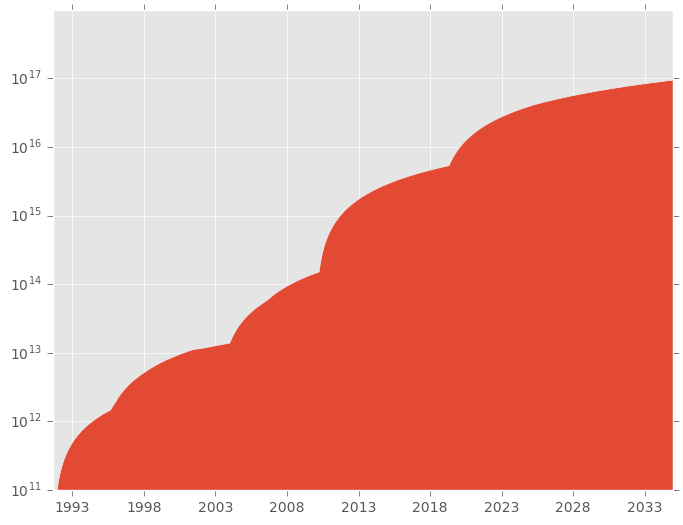

In [46]:
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_yscale("symlog", nonposy='clip')
ax.set_ylim(1e11,1e18)
ax.stackplot(missions_data.index, data_growth.sum(axis=0))
plt.show()

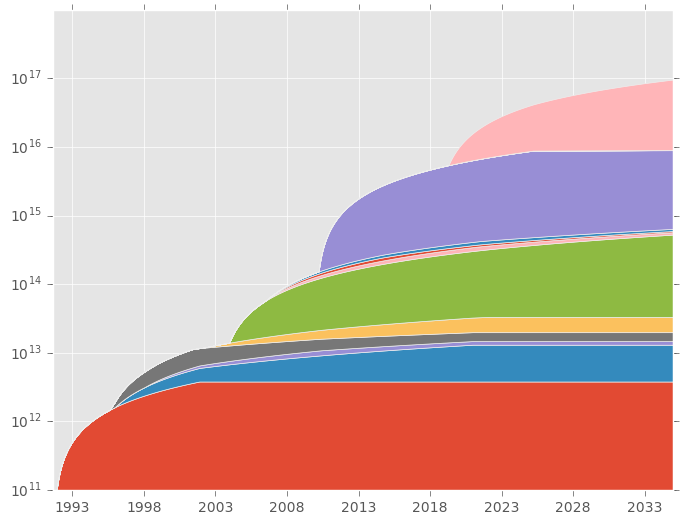

In [47]:
fig, ax = plt.subplots()
ax.set_yscale("symlog", nonposy='clip')
ax.set_ylim(1e11,1e18)
ax.stackplot(missions_data.index, data_growth)
plt.show()

Size of square:

In [48]:
sizes=np.sqrt(rate_table['Total Volume']/1e15) #into petabytes
sizes*(5/np.max(sizes))

0.0326136494142
0.0326136494142
5.0
3.09386128947
0.37652129576
0.112971841321
0.111550755301
0.132057135138
0.0618758141479
0.0515652960301
0.0384514181123


In [49]:
sizes=np.sqrt(rate_table['Data Rate']/1e9) #into terabytes
sizes*(5/np.max(sizes))


0.0273861278753
0.0273861278753
5.0
1.58113883008
0.267706306737
0.115470053838
0.11401754251
0.116975780969
0.0547722557505
0.0408248290464
0.0634822809924


In [50]:
rate_table['Mission', 'Data Rate', 'Total Volume']

Mission,Data Rate,Total Volume
,byte / d,byte
str7,float64,float64
SPP,450000000.0,3.653e+12
SO,450000000.0,3.653e+12
DKIST,1.5e+13,8.586e+16
SDO,1.5e+12,3.28740001389e+16
SOLIS,43000000000.0,4.86889001991e+14
STEREOA,8000000000.0,4.38320002778e+13
HINODE,7800000000.0,4.27362002708e+13
IRIS,8210000000.0,5.98928001898e+13


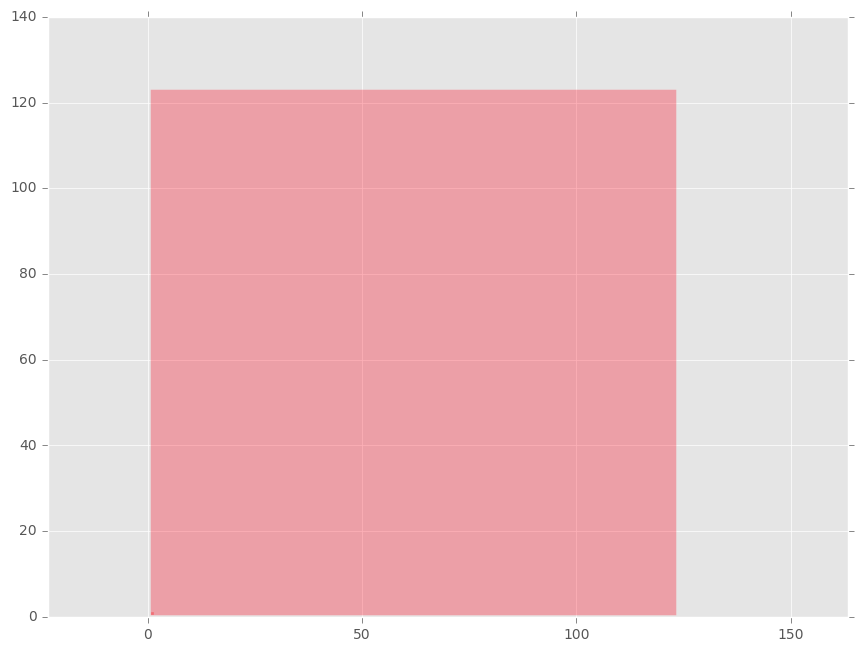

In [25]:
fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []


# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], sizes[0], sizes[0],
    boxstyle=mpatches.BoxStyle("Round", pad=0.01))
patches.append(fancybox)
#label(grid[7], "FancyBboxPatch")

fancybox2 = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], sizes[2], sizes[2],
    boxstyle=mpatches.BoxStyle("Round", pad=0.1))
patches.append(fancybox2)

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis('equal')
#plt.axis('off')

plt.show()

In [26]:
grid

array([[ 0.2,  0.2],
       [ 0.2,  0.5],
       [ 0.2,  0.8],
       [ 0.5,  0.2],
       [ 0.5,  0.5],
       [ 0.5,  0.8],
       [ 0.8,  0.2],
       [ 0.8,  0.5],
       [ 0.8,  0.8]])